In [ ]:
import numpy as np
# NumPy is used for numerical computations, such as storing Q-values, updating them, and performing array operations.

import matplotlib.pyplot as plt
# Matplotlib is used for plotting graphs, such as visualizing the policy, action-values, or agent's performance.

from envs import Maze
# Imports the custom Maze environment, likely an instance of a grid-world or similar environment for the Q-learning agent to interact with.

from utils import plot_policy, plot_action_values, test_agent
# Utility functions:
# - plot_policy: Visualizes the learned policy, showing the best action to take at each state.
# - plot_action_values: Visualizes the learned action-value function Q(s, a).
# - test_agent: Evaluates the agent’s performance after learning, running it through several episodes.


In [ ]:
env = Maze()
# Initializes the Maze environment instance where the Q-learning agent will interact.
# The environment likely includes a grid with states (locations), possible actions, and a goal state.
# 'env' will be used to reset the environment, step through the environment, and track the agent's state and reward.


In [ ]:
action_values = np.zeros((5, 5, 4))
# Initializes the Q-table (action-values) as a 3D NumPy array with dimensions (5, 5, 4).
# The first two dimensions (5, 5) represent the grid of states (e.g., a 5x5 maze).
# The third dimension (4) represents the number of possible actions in each state (e.g., up, down, left, right).
# Each entry action_values[x, y, a] will store the Q-value for taking action 'a' in state (x, y).
# Initially, all Q-values are set to zero, meaning the agent has no knowledge of the environment yet.


In [ ]:
def target_policy(state):
  # Defines a policy that selects the action with the highest Q-value for the given state (greedy policy).

  av = action_values[state]  # Retrieves the action-values (Q-values) for the given state.

  return np.random.choice(np.flatnonzero(av == av.max()))
  # Chooses the action with the maximum Q-value.
  # If there are multiple actions with the same maximum value, np.random.choice selects one of them randomly to break ties.
  # This ensures that the agent will always choose the best-known action (greedy approach).


In [ ]:
def exploratory_policy(state):
  # Defines a policy that chooses a random action for the given state (purely exploratory).

  return np.random.randint(4)
  # Randomly selects an action from the action space (0, 1, 2, 3), assuming there are 4 possible actions.
  # This is the exploration aspect of Q-learning, where the agent occasionally explores random actions instead of always exploiting the best-known action.
  # The state argument is not used here because the policy is purely random regardless of the state.


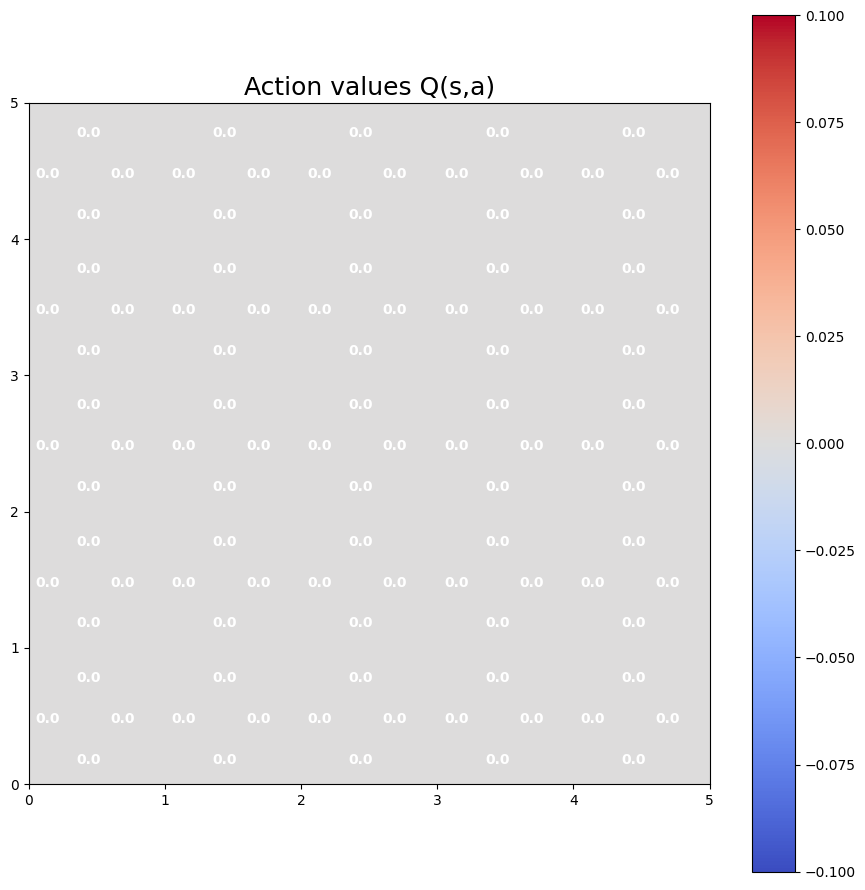

In [ ]:
plot_action_values(action_values)
# Calls the utility function to visualize the current action-value function (Q-values).
# This function likely generates a heatmap or some other graphical representation of the Q-values for each state-action pair.
# After the Q-table is initialized or updated, this visualization helps in understanding how the agent's knowledge of the environment evolves.
# It allows you to see which actions are preferred in each state based on the learned Q-values.


In [ ]:
np.object = object
# This line attempts to assign the built-in Python 'object' type to np.object, which was a deprecated feature in older versions of NumPy.
# In recent versions of NumPy, 'np.object' is deprecated, and you should use 'np.object_' instead if you are defining arrays with the object data type.


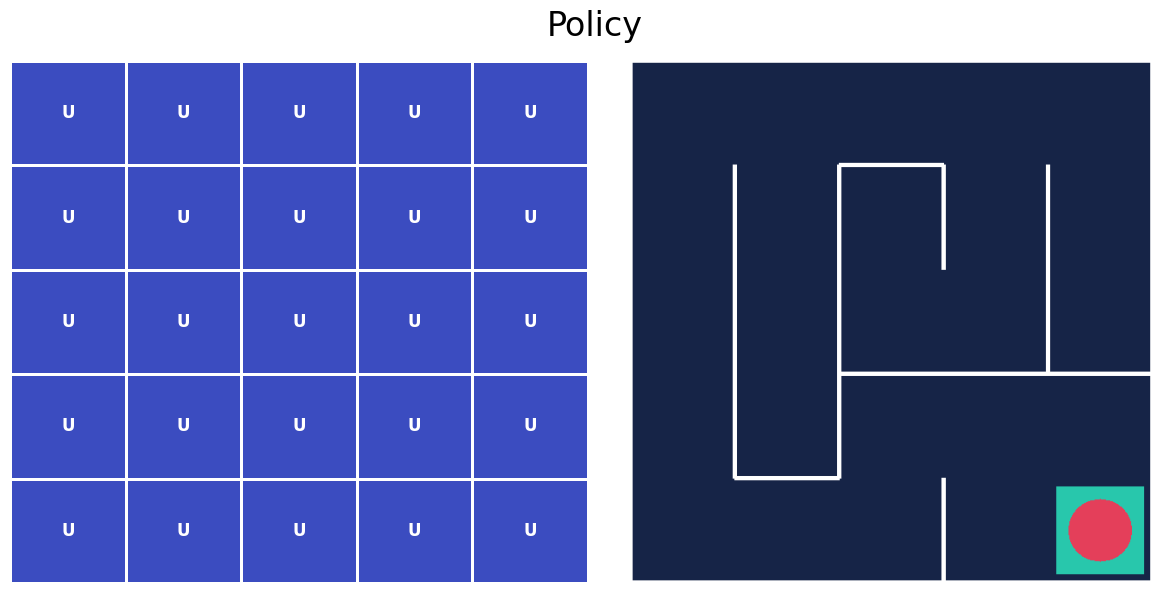

In [ ]:
plot_policy(action_values, env.render(mode='rgb_array'))
# Calls the 'plot_policy' function to visualize the learned policy overlaid on the environment's current visual representation.
# 'action_values' represents the learned Q-values for state-action pairs, which the policy uses to determine the best action in each state.
# 'env.render(mode='rgb_array')' renders the current state of the environment as an image (likely a grid or maze), allowing for visual representation of the agent's current position and its interaction with the environment.
# This visualization helps to see how the agent behaves in the environment based on its learned policy.


In [ ]:
def q_learning(action_values, exploratory_policy, target_policy, episodes, alpha=0.1, gamma=0.99):
  # Implements the Q-learning algorithm for off-policy learning.
  # 'action_values': The Q-table (Q-values) storing the expected return for each state-action pair.
  # 'exploratory_policy': The exploration policy (usually epsilon-greedy) to choose actions.
  # 'target_policy': The target policy (greedy policy) used to select actions based on the maximum Q-value.
  # 'episodes': Number of episodes to train the agent.
  # 'alpha': Learning rate, determining how much new information overrides the old Q-value.
  # 'gamma': Discount factor for future rewards (usually close to 1).

  for episode in range(1, episodes + 1):
    state = env.reset()  # Reset the environment to start a new episode.
    done = False

    while not done:
      action = exploratory_policy(state)  # Choose an action using the exploratory policy (e.g., epsilon-greedy).
      next_state, reward, done, _ = env.step(action)  # Take the action and observe the next state and reward.
      next_action = target_policy(next_state)  # Select the next action using the target policy (greedy).

      # Retrieve the current Q-value for the state-action pair (s, a).
      qsa = action_values[state][action]

      # Retrieve the Q-value for the next state-action pair (s', a') using the target policy.
      next_qsa = action_values[next_state][next_action]

      # Update the Q-value for the current state-action pair using the Q-learning update rule:
      # Q(s, a) ← Q(s, a) + α * [R + γ * max(Q(s', a')) - Q(s, a)]
      action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)

      state = next_state  # Move to the next state.

# Call the Q-learning function to train the agent for 100 episodes.
q_learning(action_values, exploratory_policy, target_policy, 100)


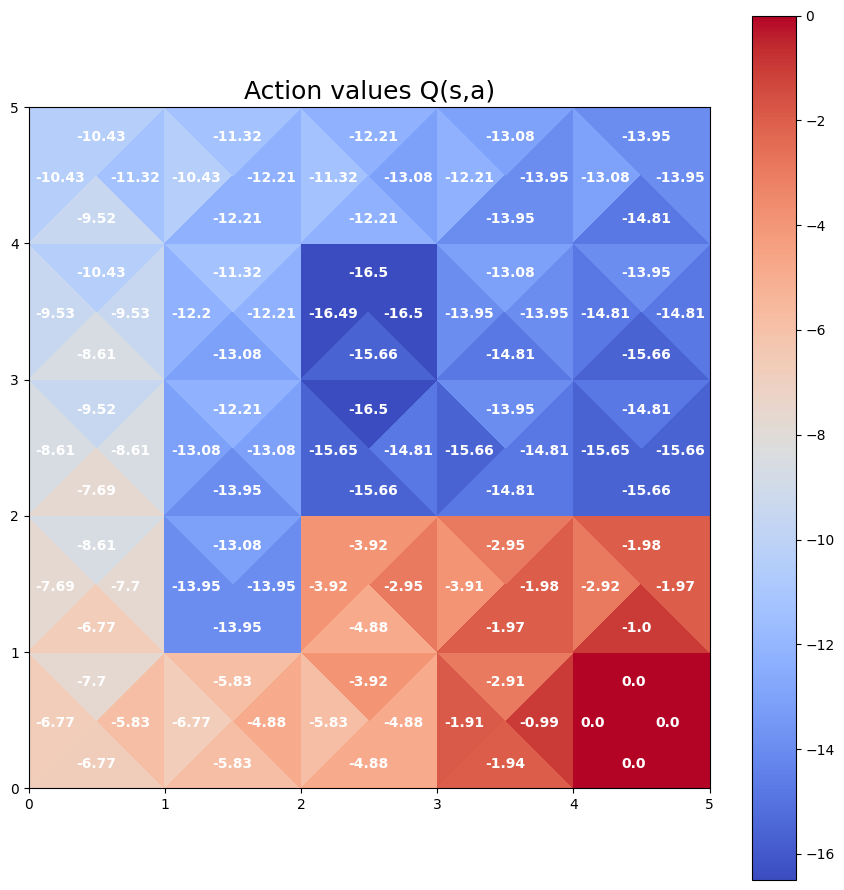

In [ ]:
plot_action_values(action_values)
# Visualizes the Q-values (action-values) after training the Q-learning agent.
# This function will generate a graphical representation of the Q-table for each state-action pair.
# It helps to see how the Q-values have been updated across episodes, showing which actions are preferred in each state.
# The plot might display a heatmap or similar visualization to highlight the learned action values.


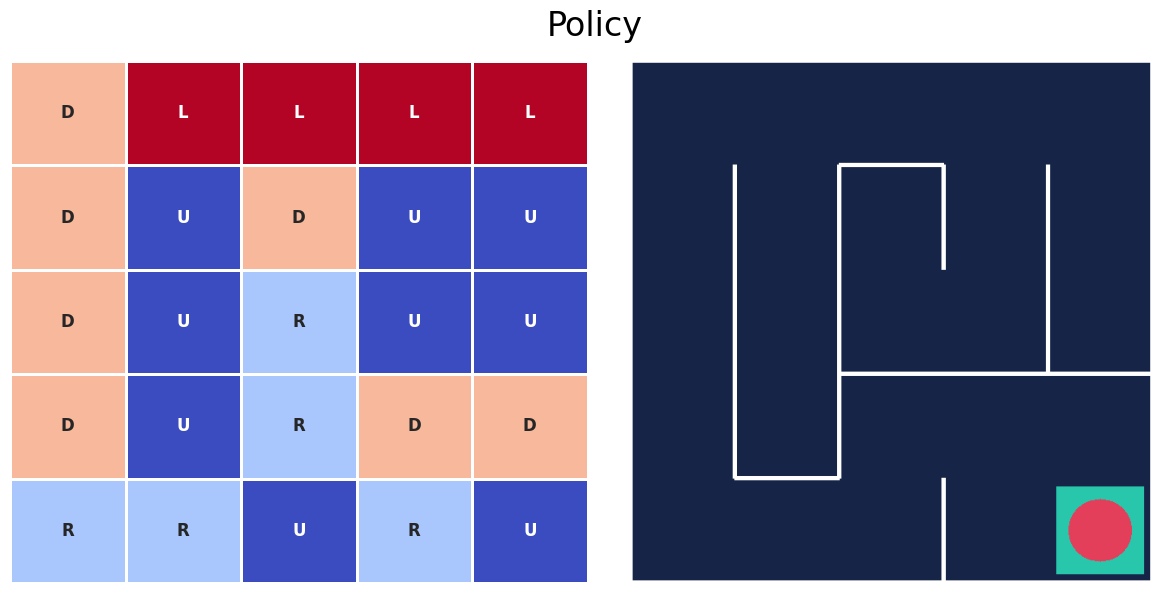

In [ ]:
plot_policy(action_values, env.render(mode='rgb_array'))
# Calls the 'plot_policy' function to overlay the learned policy on the current visual representation of the environment.
# 'action_values' represents the learned Q-values for state-action pairs, which are used to determine the best action for each state.
# 'env.render(mode='rgb_array')' renders the current state of the environment as an image (likely a grid or maze), which is used as the backdrop for the policy visualization.
# This visualization shows the agent's learned policy (best actions) on the maze or environment, indicating how the agent would navigate the environment.


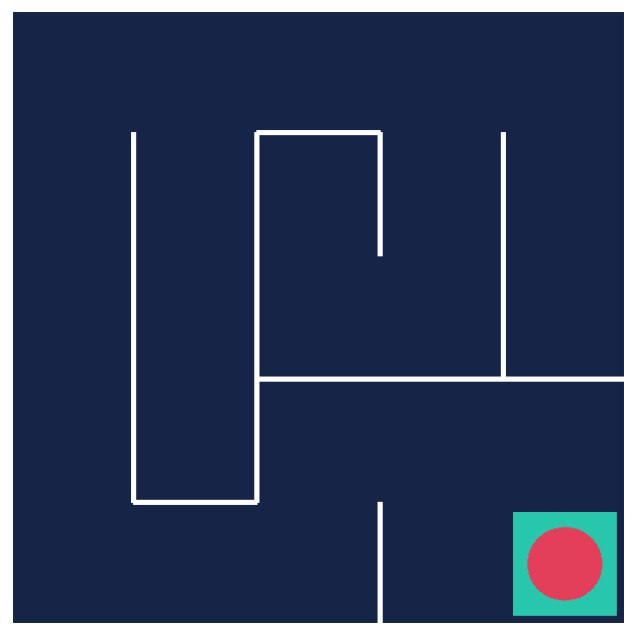

In [ ]:
test_agent(env, target_policy, episodes=5)
# Calls the 'test_agent' function to evaluate the performance of the trained agent.
# 'env' is the environment (the maze), and 'target_policy' is the learned greedy policy (maximizing Q-values).
# 'episodes=5' specifies the number of episodes the agent will run to test its performance.
# The function will run the agent through the specified number of episodes, where it follows the target (greedy) policy.
# It will likely output performance metrics like total rewards per episode, number of steps taken, or success in reaching the goal.
